In [1]:
!pip install diffusers transformers accelerate torch Pillow


In [2]:
from diffusers import StableDiffusionPipeline, StableDiffusionImg2ImgPipeline
import torch
from PIL import Image
import random

class StableDiffusionModel:
    def __init__(self, use_lora=False, lora_weights_path=None, base_model="sd-legacy/stable-diffusion-v1-5"):
        """
        Initialize the Stable Diffusion model with optional LoRA weights.
        If no LoRA is provided, it uses the base model only.
        
        Args:
            use_lora (bool): Whether to load a LoRA model on top of the base model.
            lora_weights_path (str): Path to the LoRA weights file.
            base_model (str): Path to the base model, default is Stable Diffusion 1.5.
        """
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        self.base_model = base_model
        self.use_lora = use_lora
        self.lora_weights_path = lora_weights_path

        # Load the base model
        self.text2img_pipe = StableDiffusionPipeline.from_pretrained(self.base_model, torch_dtype=torch.float16).to(self.device)

        # Apply LoRA weights if specified
        if self.use_lora and self.lora_weights_path:
            self.load_lora_weights()

    def load_lora_weights(self):
        """Load LoRA weights onto the pipeline if specified."""
        print(f"Loading LoRA weights from {self.lora_weights_path}")
        self.text2img_pipe.load_lora_weights(self.lora_weights_path)

    def generate_text_to_image(self, prompt, negative_prompt=None, guidance_scale=7, num_inference_steps=31, seed=None):
        """
        Generate an image from a text prompt using the Text-to-Image pipeline.
        
        Args:
            prompt (str): The text prompt for image generation.
            negative_prompt (str): The negative prompt for avoiding certain attributes in the image.
            guidance_scale (float): The strength of the prompt influence. Default is 7.
            num_inference_steps (int): The number of diffusion steps. Default is 31.
            seed (int): Optional seed for reproducibility. If None, random seed is used.
        """
        # Set the seed if specified for reproducibility
        if seed is not None:
            torch.manual_seed(seed)
            print(f"Using seed: {seed}")
        
        # Generate the image
        image = self.text2img_pipe(prompt, negative_prompt=negative_prompt, guidance_scale=guidance_scale, num_inference_steps=num_inference_steps).images[0]
        return image

    def upscale_image(self, image, scale=2):
        """Optional: Upscale the image using an external tool (e.g., Real-ESRGAN)."""
        # You can integrate Real-ESRGAN or any other upscaler here for high-res fixes
        pass  # Placeholder for future integration of an upscaler


In [3]:
# Path to the downloaded LoRA file
lora_weights_path = "Helldiver.safetensors"  # Replace with your actual LoRA file path

# Initialize the model with LoRA
model = StableDiffusionModel(use_lora=True, lora_weights_path=lora_weights_path)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading LoRA weights from Helldiver.safetensors


  0%|          | 0/31 [00:00<?, ?it/s]

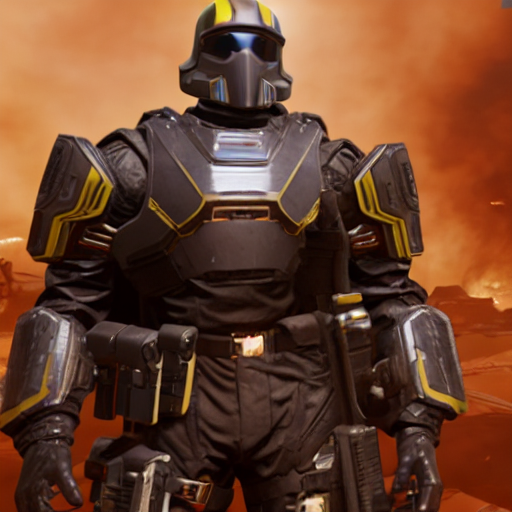

In [14]:
# Define the prompt and negative prompt
prompt = "black armor, upper body, profile picture, cape, yellow accents, explosion, fire, laser, on a pile of fragmented automatons in a battlefield where the sky is red and black, blood and oil spilled armor"
negative_prompt = "bad anatomy, bad hands, poorly drawn face, poorly drawn hands, missing limb, out of focus, monochrome, symbol, text, logo, lowres, censored, signature"

# Set parameters
guidance_scale = 7
num_inference_steps = 31
seed=None

# Generate a Text-to-Image output with the specified prompt and negative prompt
image = model.generate_text_to_image(prompt, negative_prompt, guidance_scale, num_inference_steps, seed)
image.show()  # Display the generated image

In [33]:
# Define the prompt and negative prompt
prompt = "(masterpiece, best quality, ultra-detailed, best shadow), Helldiver, chestplate, helmet, cape, restaurant, pizza on the table"
negative_prompt = "bad anatomy, cropped, poorly drawn face, low quality"

